In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from pathlib import Path 
%matplotlib inline

In [3]:
whale_csv = Path('../pandas_homework/whale_returns.csv')
algo_csv = Path('../pandas_homework/algo_returns.csv')
sp500_csv = Path('../pandas_homework/sp500_history.csv')

In [4]:
whale_returns = pd.read_csv(whale_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns = pd.read_csv(algo_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500 = pd.read_csv(sp500_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index(inplace=True)
algo_returns.sort_index(inplace=True)
sp500.sort_index(inplace=True)

### Data Cleaning

In [5]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
sp500.dtypes

Close    object
dtype: object

In [10]:
sp500['Close']=sp500['Close'].str.replace('$','')
sp500['Close']=sp500['Close'].astype('float')

In [11]:
sp500.dtypes

Close    float64
dtype: object

In [12]:
sp500_returns = sp500.pct_change()
sp500_returns.head(3)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624


In [13]:
sp500_returns.isnull().sum()

Close    1
dtype: int64

In [14]:
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
sp500_returns.columns=["SP500"]
sp500_returns.head(1)

,SP500
Date,
2012-10-02,0.000872


### Performance

In [17]:
combined_returns = pd.concat([whale_returns,algo_returns,sp500_returns],axis='columns',join='inner')

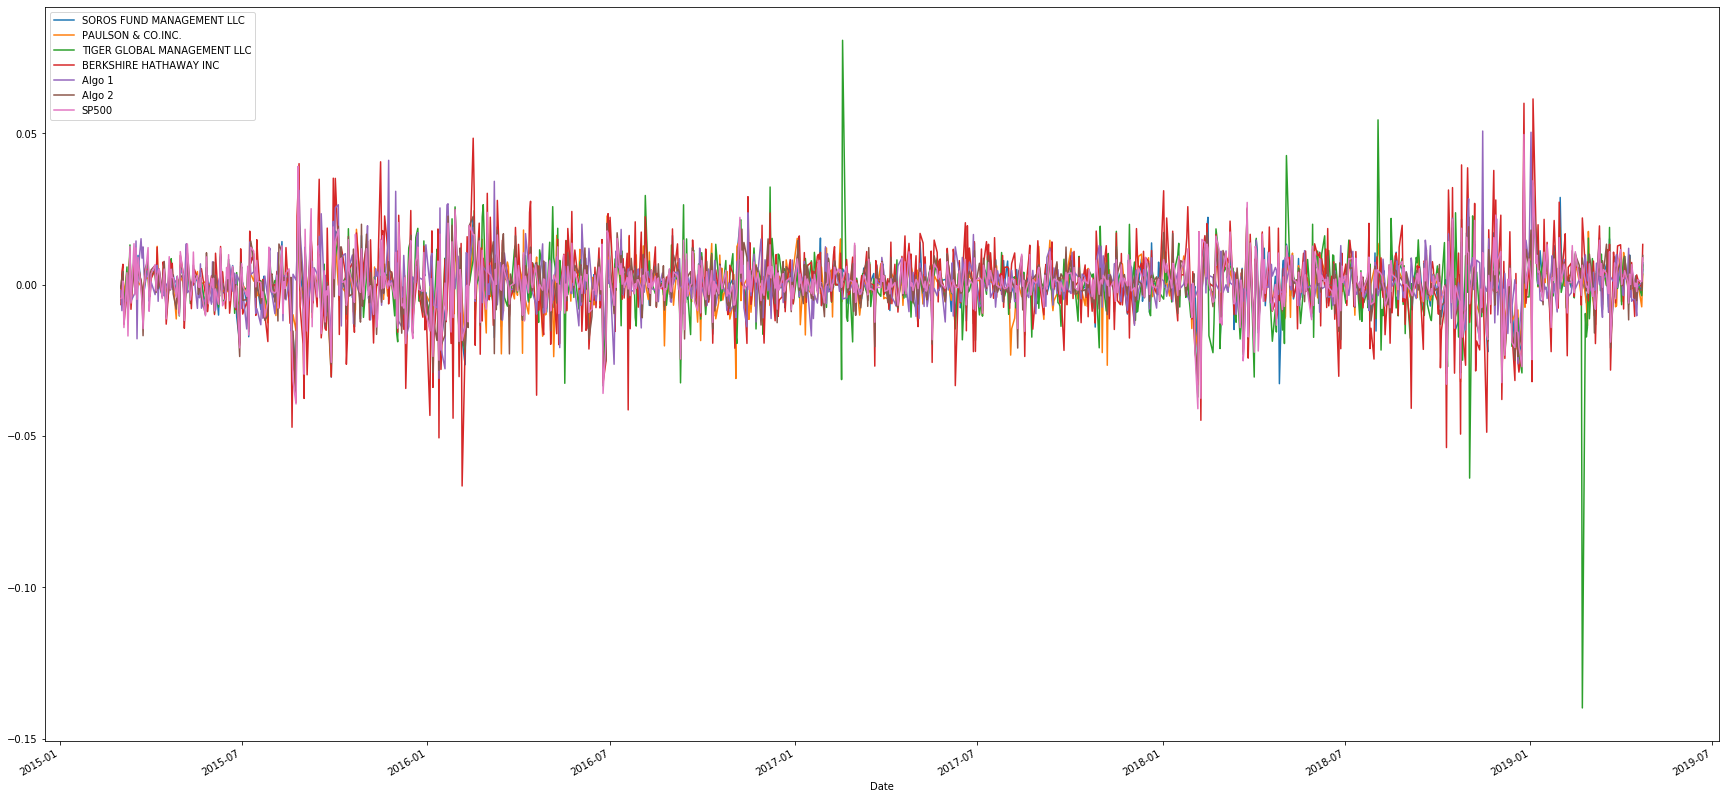

In [18]:
combined_returns.plot(figsize=(30,15))

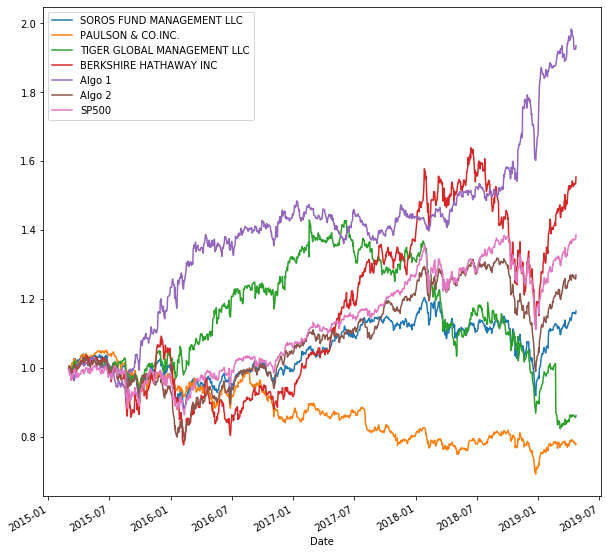

In [19]:
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot(figsize=(10,10))

#### Berkshire Hathaway and Algo 1 have outperformed the S&P500.

### Risk

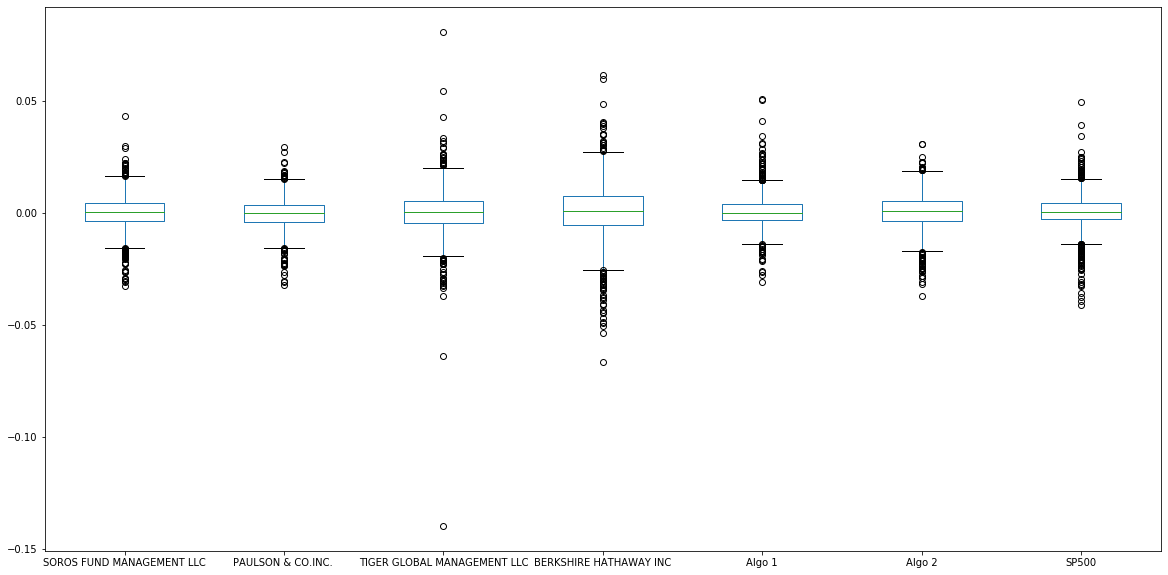

In [21]:
combined_returns.plot(kind='box',figsize=(20,10))

#### Algo 1 has the smallets spread and Berkshire Hathaway has the largest spread.

In [20]:
combined_returns.std().sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

#### Tiger Global and Berkshire Hathaway are riskier than the S&P500. 

In [21]:
annualized_std = combined_returns.std() * np.sqrt(252)
annualized_std.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP500                          0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

In [120]:
annualized_std > annualized_std['SP500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Rolling Statistics

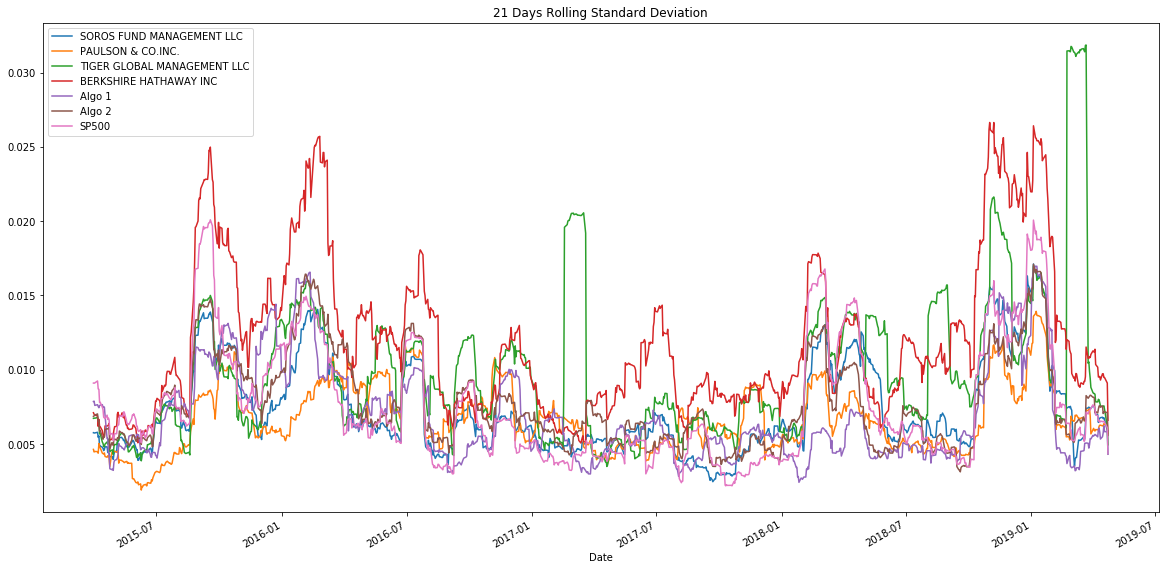

In [27]:
combined_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Days Rolling Standard Deviation")

#### Most of the portfolios are on the same trend as the S&P500. 
#### Tiger and Berkshire are the ones that have periods of riskiness increasing by a greater rate than the the S&P500 risk.  

In [47]:
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


#### Algo 2 is the portfolio that mimic the S&P500 the closest.

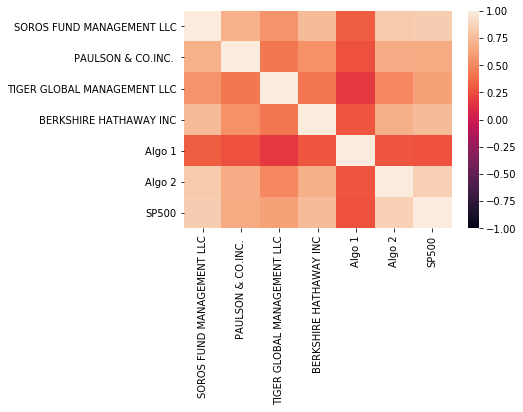

In [48]:
sns.heatmap(correlation, vmin=-1,vmax=1)

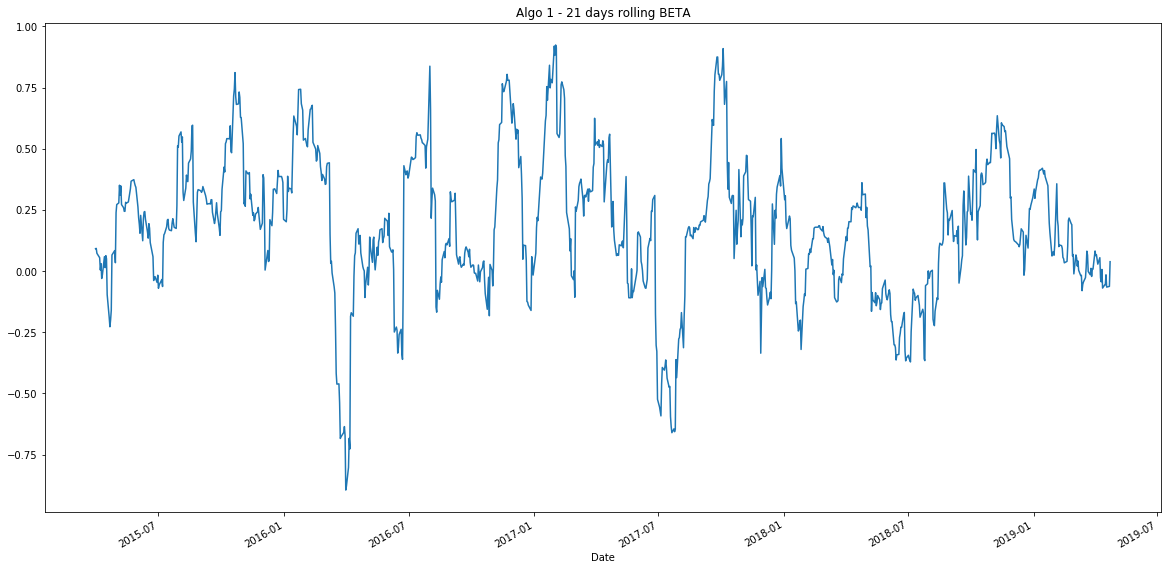

In [32]:
algo_covariance=combined_returns['Algo 1'].rolling(window=21).cov(combined_returns['SP500'])
algo_variance=combined_returns['SP500'].rolling(window=21).var()
algo_beta=algo_covariance/algo_variance
algo_beta.plot(figsize=(20,10), title='Algo 1 - 21 days rolling BETA')

#### Mostly the Algo 1 portfolio does not seem too sensitive to the market. Other than in certain spikes, the portfolio stays very independent of the movements in the market.

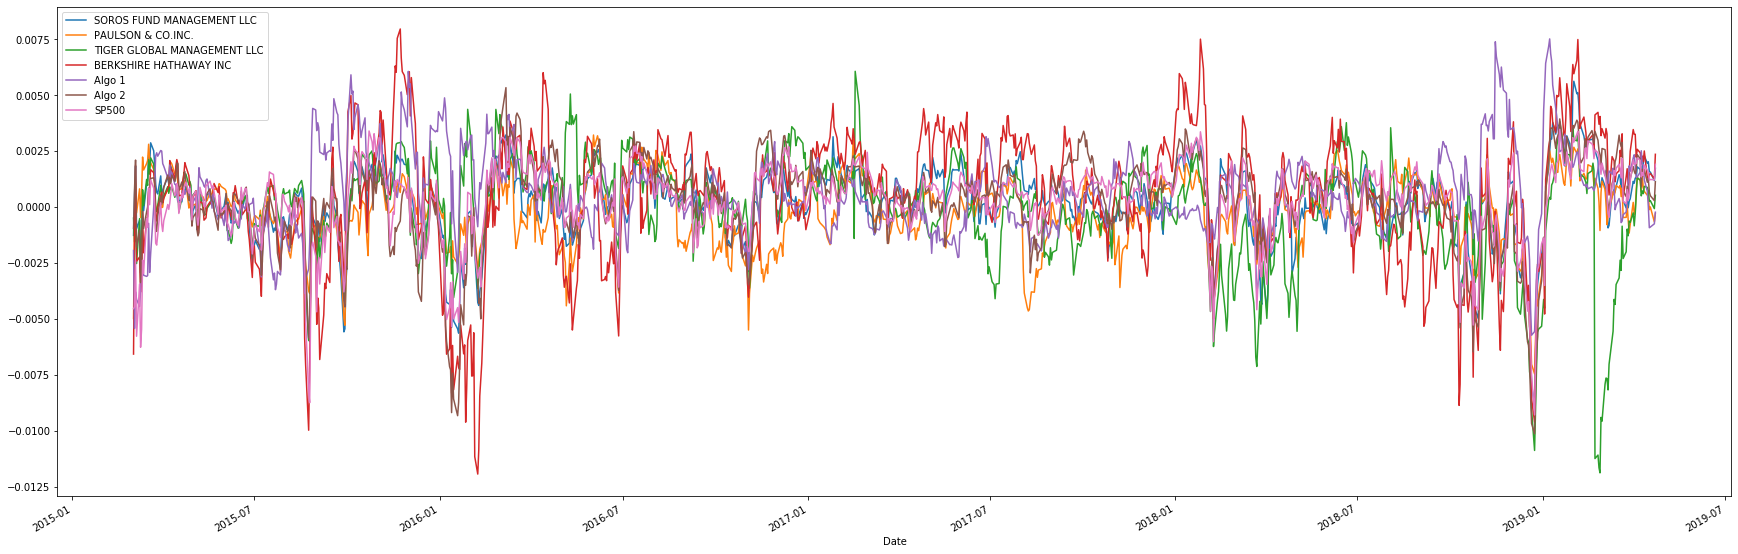

In [118]:
combined_returns.ewm(span=21).mean().plot(figsize=(30,10))

### SHARPE RATIO

In [50]:
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

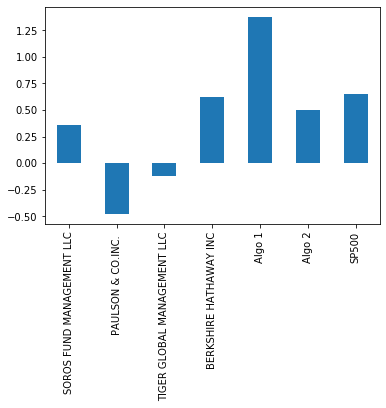

In [51]:
sharpe_ratios.plot(kind='bar')

#### Only Algo 1 portfolio outperformed the S&P500 and all whales in regards to its risk-reward relationship. 

### CUSTOM PORTFOLIO

In [58]:
baba_csv= Path('../pandas_homework/BABA.csv')
sbux_csv= Path('../pandas_homework/SBUX.csv')
bmy_csv= Path('../pandas_homework/BMY.csv')
# Alibaba, Starbucks and Brystol-Myers Squibb

In [67]:
baba = pd.read_csv(baba_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
bmy = pd.read_csv(bmy_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sbux = pd.read_csv(sbux_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
baba.columns=['BABA']
bmy.columns=['BMY']
sbux.columns=['SBUX']

In [78]:
sbux.isnull().sum() #Checked for null values for all three stocks. 

SBUX    0
dtype: int64

In [73]:
custom = pd.concat([baba, sbux, bmy],axis='columns',join='inner')
custom_returns = custom.pct_change()
custom_returns.head()

,BABA,SBUX,BMY
Date,,,
2014-09-19,NaN,NaN,NaN
2014-09-22,-0.042603,-0.019195,0.003106
2014-09-23,-0.030259,-0.008579,-0.007354
2014-09-24,0.039004,0.018388,0.013063
2014-09-25,-0.018218,-0.015932,-0.006543


In [75]:
weights = [1/3,1/3,1/3]
portfolio_returns = custom_returns.dot(weights)
portfolio_returns.head()

Date
2014-09-19         NaN
2014-09-22   -0.019564
2014-09-23   -0.015398
2014-09-24    0.023485
2014-09-25   -0.013564
dtype: float64

In [80]:
portfolio_returns.isnull().sum()

1

In [81]:
portfolio_returns.dropna(inplace=True)

In [104]:
all_portfolios = pd.concat([combined_returns,portfolio_returns],axis='columns',join='inner')
all_portfolios.columns=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','SP500','Custom']
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.012415
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.032830
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.006385
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016330
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.001926


In [105]:
all_portfolios.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
Custom                         0
dtype: int64

In [106]:
all_portfolios.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
Custom                         0.187236
dtype: float64

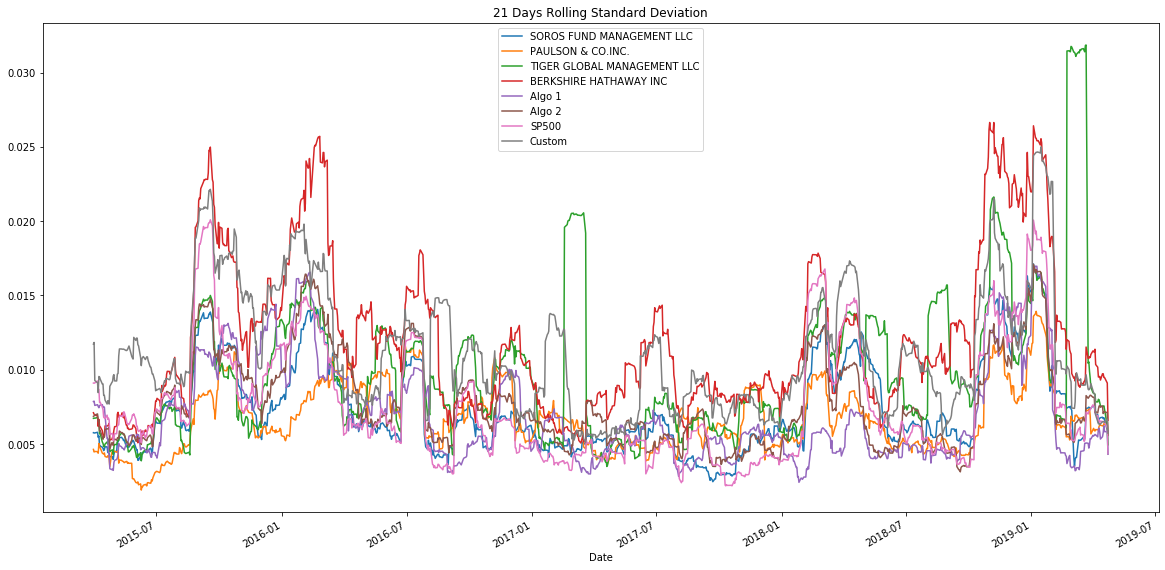

In [107]:
all_portfolios.rolling(window=21).std().plot(figsize=(20,10), title="21 Days Rolling Standard Deviation")

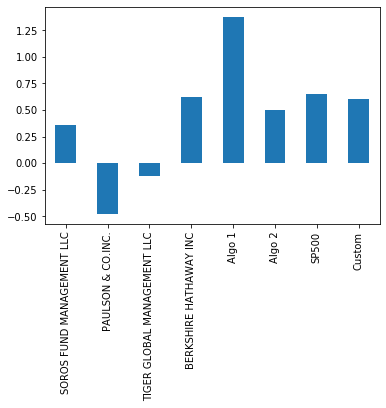

In [108]:
all_sratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
all_sratios.plot(kind='bar')

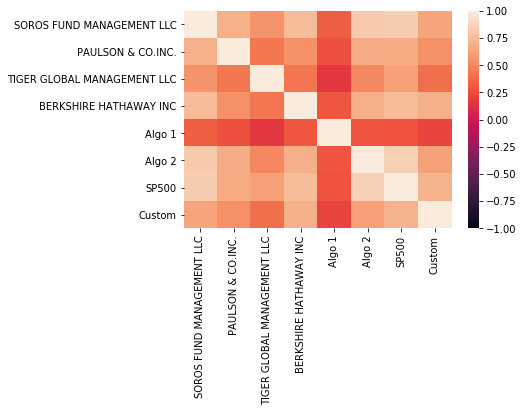

In [110]:
sns.heatmap(all_portfolios.corr(), vmin=-1,vmax=1)

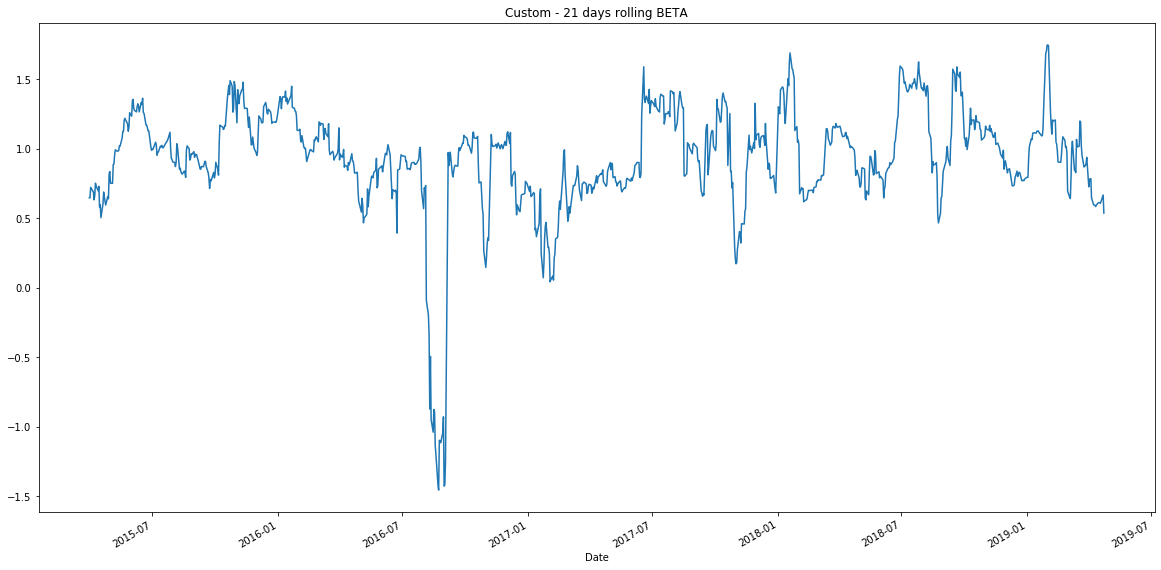

In [114]:
custom_covariance=all_portfolios['Custom'].rolling(window=21).cov(all_portfolios['SP500'])
custom_variance=all_portfolios['SP500'].rolling(window=21).var()
custom_beta=custom_covariance/custom_variance
custom_beta.plot(figsize=(20,10), title='Custom - 21 days rolling BETA')

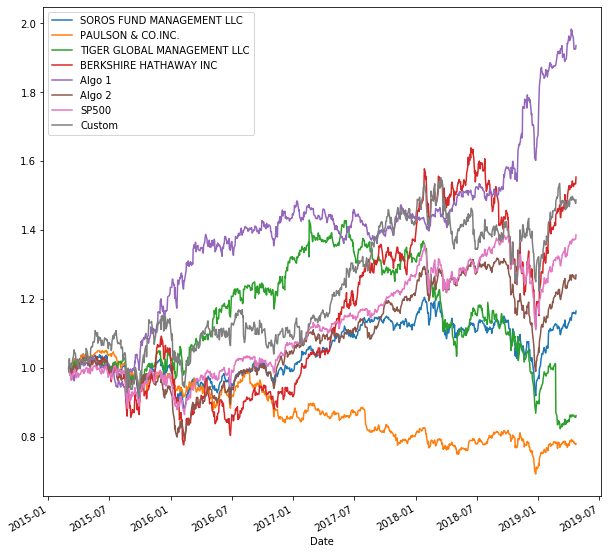

In [116]:
cumulative_all = (1 + all_portfolios).cumprod()
cumulative_all.plot(figsize=(10,10))

#### Although not having a better sharpe ratio than the S&P500, the CUSTOM portfolio outperformed the market. The rolling BETA stayed close to 1 at most periods even not having the strongest correlation with the market.